## This code will call the t-values and plot them 

Author: Fouzia Fahrin (ffahrin@iastate.edu)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.linear_model import LinearRegression

from datetime import datetime, timedelta
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
#install tol-colors

ERROR 1: PROJ: proj_create_from_database: Open of /opt/miniconda3/envs/prod/share/proj failed


#### Change accordingly

In [3]:
#change for different wave name
wavename= 'Kelvin'

#change for different base
base_name= 'NH'
level = 850
level_up= 200

#lag days
lags = np.timedelta64(-2,'D') #2 days before
lagf = np.timedelta64(2,'D') #2 days after

# for ncfile call
plev = '850'
plev_up = '200'

In [4]:
# for ncfile call
lag = '0 days'

In [5]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_u10_tvals_"+lag+"_"+plev+"_"+base_name+".nc"
data_u= xr.open_dataset(dri+fn)

In [6]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_u10_tvals_"+lag+"_"+plev_up+"_"+base_name+".nc"
data_uwind= xr.open_dataset(dri+fn)

In [7]:
uxarray = data_u['u'].compute()
uxarray_wind = data_uwind['u'].compute()

In [8]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_v10_tvals_"+lag+"_"+plev+"_"+base_name+".nc"
data_v = xr.open_dataset(dri+fn)
#data_v

In [9]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_v10_tvals_"+lag+"_"+plev_up+"_"+base_name+".nc"
data_vwind = xr.open_dataset(dri+fn)

In [10]:
vxarray = data_v['v'].compute()
vxarray_wind = data_vwind['v'].compute()

In [11]:
#dri = '/lss/research/agon-lab/IMERG-daily/interpolated/equ_waves/'
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_pr_tvals_"+lag+"_"+plev+"_"+base_name+".nc"
data_p = xr.open_dataset(dri+fn)
data_p

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 106)
Coordinates:
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 190.0 191.0 192.0 193.0 ... 292.0 293.0 294.0 295.0
Data variables:
    precip   (lat, lon) float64 ...

In [12]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_pr_tvals_"+lag+"_"+plev_up+"_"+base_name+".nc"
data_pr = xr.open_dataset(dri+fn)
data_pr

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 106)
Coordinates:
  * lat      (lat) float64 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float64 190.0 191.0 192.0 193.0 ... 292.0 293.0 294.0 295.0
Data variables:
    precip   (lat, lon) float64 ...

In [13]:
pr = data_p['precip'].compute()
pr_up = data_pr['precip'].compute()

In [19]:
u = (uxarray)**2
v= (vxarray)**2

In [20]:
u_wind = (uxarray_wind)**2
v_wind= (vxarray_wind)**2

In [21]:
wind_speed = (u+v)**(1/2)
wind_speed_up = (u_wind+v_wind)**(1/2)

In [22]:
lon, lat = np.meshgrid(wind_speed['longitude'], wind_speed['latitude'])
lon2D, lat2D = np.meshgrid(wind_speed_up['longitude'], wind_speed_up['latitude'])

## lag calculation

In [23]:
# for ncfile call
lag = '2 days'

before lag

In [24]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_u10_tvals_before_"+lag+"_"+plev+"_"+base_name+".nc"
    
data_u_lag = xr.open_dataset(dri+fn)

In [25]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_u10_tvals_before_"+lag+"_"+plev_up+"_"+base_name+".nc"
    
data_uwind_lag = xr.open_dataset(dri+fn)

In [26]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_v10_tvals_before_"+lag+"_"+plev+"_"+base_name+".nc"
    
data_v_lag = xr.open_dataset(dri+fn)

In [27]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_v10_tvals_before_"+lag+"_"+plev_up+"_"+base_name+".nc"
    
data_vwind_lag = xr.open_dataset(dri+fn)

In [28]:
u_xarray_lag = data_u_lag['u'].compute()
uwind_xarray_lag = data_uwind_lag['u'].compute()

In [29]:
v_xarray_lag = data_v_lag['v'].compute()
vwind_xarray_lag = data_vwind_lag['v'].compute()

#### Precip slope (2 days before)

In [30]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_pr_tvals_before_"+lag+"_"+plev+"_"+base_name+".nc"
data_pr_lag = xr.open_dataset(dri+fn)

In [31]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_pr_tvals_before_"+lag+"_"+plev_up+"_"+base_name+".nc"
data_pr_up_lag = xr.open_dataset(dri+fn)

In [32]:
pr_lag = data_pr_lag['precip'].compute()
pr_up_lag = data_pr_up_lag['precip'].compute()

#### wind lag slope (2 days after)

In [33]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_u10_tvals_after_"+lag+"_"+plev+"_"+base_name+".nc"
data_u_lagf = xr.open_dataset(dri+fn)


In [34]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_u10_tvals_after_"+lag+"_"+plev_up+"_"+base_name+".nc"
data_uwind_lagf = xr.open_dataset(dri+fn)


In [35]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_v10_tvals_after_"+lag+"_"+plev+"_"+base_name+".nc"
data_v_lagf = xr.open_dataset(dri+fn)


In [36]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_v10_tvals_after_"+lag+"_"+plev_up+"_"+base_name+".nc"
data_vwind_lagf = xr.open_dataset(dri+fn)


In [37]:
u_xarray_lagf = data_u_lagf['u'].compute()
uwind_xarray_lagf = data_uwind_lagf['u'].compute()

In [38]:
v_xarray_lagf = data_v_lagf['v'].compute()
vwind_xarray_lagf = data_vwind_lagf['v'].compute()

#### Precip slope (2 days after)

In [39]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_pr_tvals_after_"+lag+"_"+plev+"_"+base_name+".nc"
    
data_pr_lagf = xr.open_dataset(dri+fn)

In [40]:
dri = '/home/ffahrin/test/IMERG/regression/t_results/'
fn = wavename+"_pr_tvals_after_"+lag+"_"+plev_up+"_"+base_name+".nc"
    
data_pr_up_lagf = xr.open_dataset(dri+fn)

In [41]:
pr_lagf = data_pr_lagf['precip'].compute()
pr_up_lagf = data_pr_up_lagf['precip'].compute()

In [42]:
u850_lag= (u_xarray_lag)**2
v850_lag= (v_xarray_lag)**2

In [43]:
u850wind_lag= (uwind_xarray_lag)**2
v850wind_lag= (vwind_xarray_lag)**2

In [44]:
u850_lagf= (u_xarray_lagf)**2
v850_lagf= (v_xarray_lagf)**2

In [45]:
u850wind_lagf= (uwind_xarray_lagf)**2
v850wind_lagf= (vwind_xarray_lagf)**2

In [46]:
wind_speed_lag= (u850_lag + v850_lag)**(1/2)
lon2Dlag, lat2Dlag = np.meshgrid(wind_speed_lag['longitude'], wind_speed_lag['latitude'])

In [47]:
wind_speed_up_lag= (u850wind_lag + v850wind_lag)**(1/2)
lon2Dlagup, lat2Dlagup = np.meshgrid(wind_speed_up_lag['longitude'], wind_speed_up_lag['latitude'])

In [48]:
wind_speed_lagf= (u850_lagf + v850_lagf)**(1/2)
lon2Dlagf, lat2Dlagf = np.meshgrid(wind_speed_lagf['longitude'], wind_speed_lagf['latitude'])

In [49]:
wind_speed_up_lagf= (u850wind_lagf + v850wind_lagf)**(1/2)
lon2Dlagfup, lat2Dlagfup = np.meshgrid(wind_speed_up_lagf['longitude'], wind_speed_up_lagf['latitude'])

#### Change

In [50]:
day=2

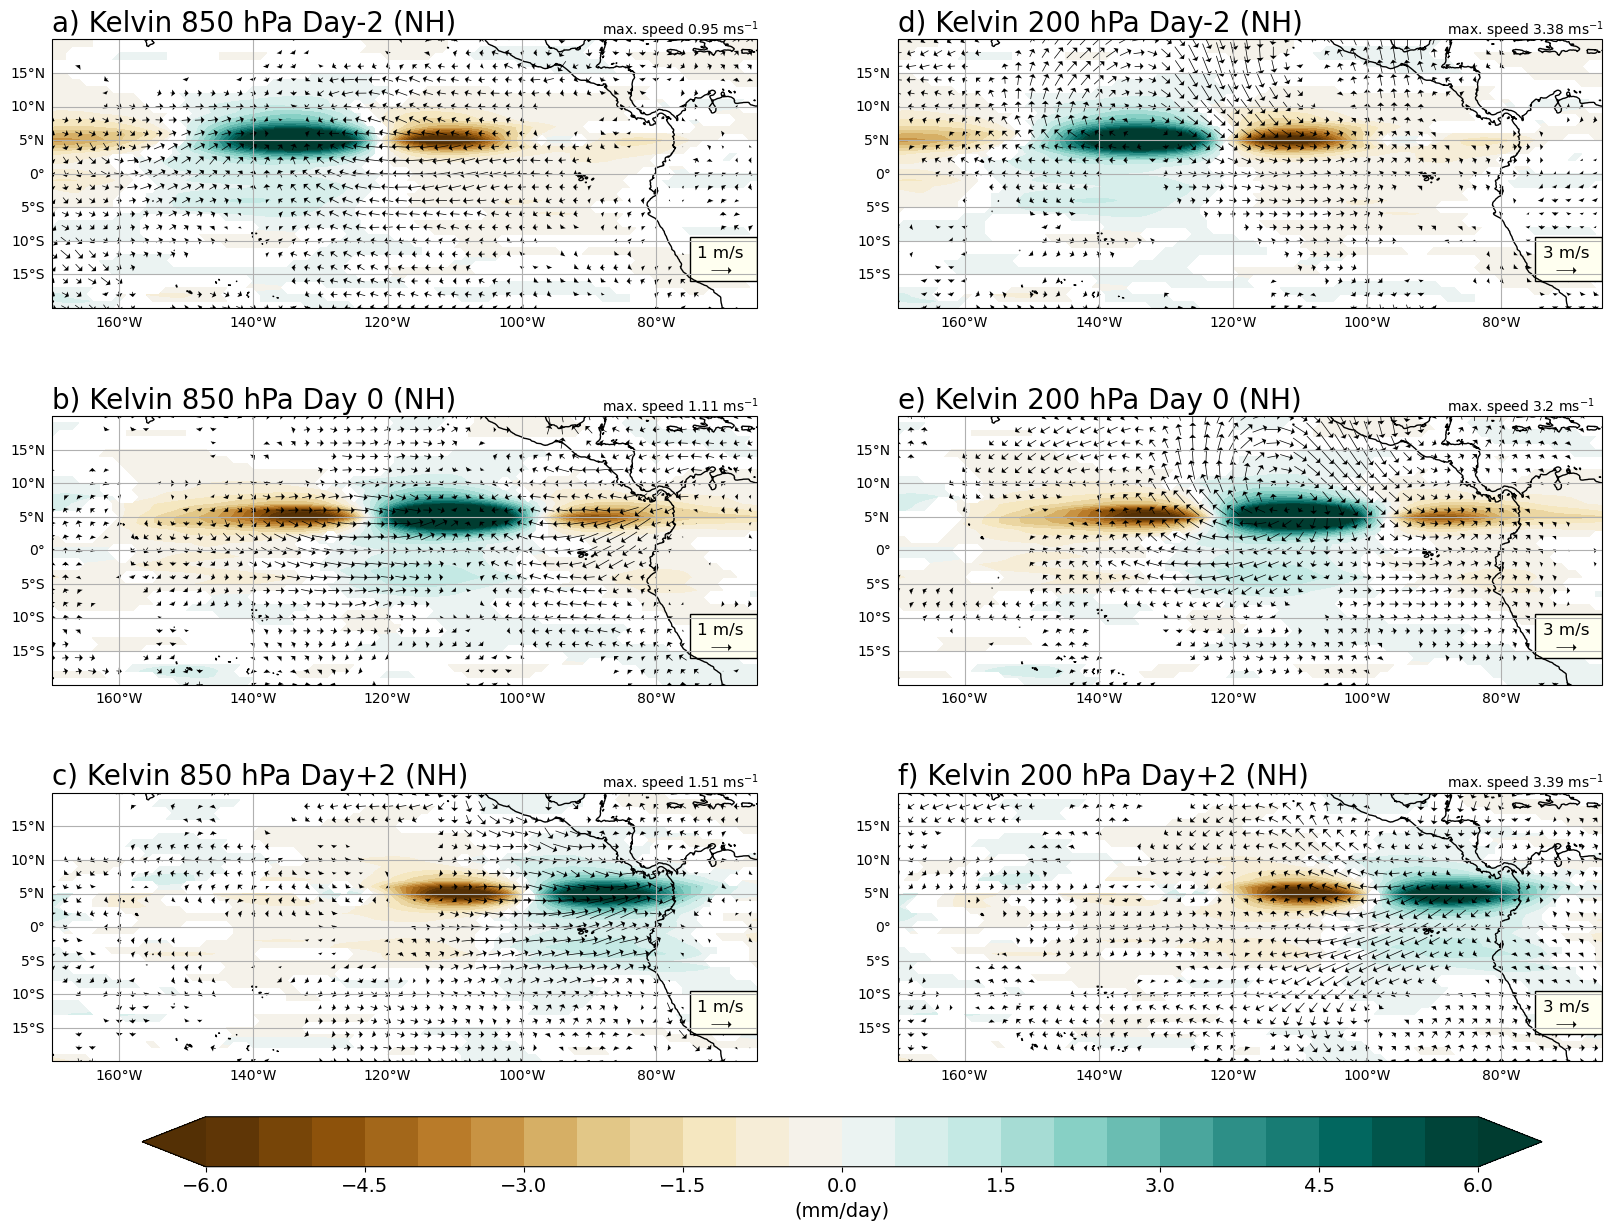

In [714]:
figfolder = './'
le= np.arange(-5,5.5, 0.5)
wave="Kelvin"
c_map = plt.matplotlib.colormaps.get_cmap('BrBG')
proj = ccrs.PlateCarree()
fs=20
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
npan = 6 #
lev= np.arange(-6,6.5, 0.5)
fig = plt.figure(figsize=(20, 25))#, tight_layout='true')
for j in range(0,npan,1):
    ax1 = fig.add_subplot(npan,2,j+1,projection=ccrs.PlateCarree())
    ax1.coastlines('50m')
    gl = ax1.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
    gl.top_labels = False
    gl.right_labels = False
    
    # these are matplotlib.patch.Patch properties
    #props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    if j == 0: 
        cf = plt.contourf(pr_lag['lon'], pr_lag['lat'], pr_lag, cmap=c_map, levels=lev,extend= 'both')
        
        q0= plt.quiver(lon2Dlag[::2,::2], lat2Dlag[::2,::2], u_xarray_lag[::2,::2], v_xarray_lag[::2,::2],
                       color = 'black',zorder=1, pivot="middle", scale=0.05, 
                       scale_units='dots',width=0.001,headwidth=10, units='width')
    
        ax1.quiverkey(q0, .949, .14, 1, r'1 m/s',labelpos='N', coordinates='axes',color='black', fontproperties={'size': 12}, zorder=6)
        ax1.add_patch(plt.Rectangle((-75, -16), 10,  6.5,  # height
             facecolor='ivory',edgecolor='k',alpha =1))
                  
        plt.annotate('max. speed '+str(np.round((wind_speed_lag.max().values), decimals=2))+' ms$^{-1}$', 
                     xy=(0.78, 1.02), xycoords= 'axes fraction')
        
        
    
        plt.title('a)'+' '+wave+' '+ str(level)+' '+ 'hPa Day-'+str(day)+' '+'('+base_name+')', fontsize=fs,loc='left')

        
    elif j == 2: 
        cf = plt.contourf(pr['lon'], pr['lat'], pr, cmap=c_map, levels=lev,extend= 'both')
        
        q1 = plt.quiver(lon[::2,::2], lat[::2,::2], uxarray[::2,::2], vxarray[::2,::2],
                        color = 'black',zorder=1, pivot="middle", scale= q0.scale, scale_units='dots',
                        width=q0.width, headwidth=10, units='width')
        
        plt.title('b)'+' '+wave+' '+ str(level)+' '+ 'hPa Day 0' +' '+'('+base_name+')', fontsize=fs,loc='left')
    
        
        ax1.quiverkey(q1, .949, .14, 1, r'1 m/s',labelpos='N', coordinates='axes',color='black', fontproperties={'size': 12}, zorder=6)
        ax1.add_patch(plt.Rectangle((-75, -16), 10,  6.5,  # height
             facecolor='ivory',edgecolor='k',alpha =1))
        
        plt.annotate('max. speed '+str(np.round((wind_speed.max().values), decimals=2))+' ms$^{-1}$', 
                     xy=(0.78, 1.02), xycoords= 'axes fraction')
        
        
        
    elif j == 4: 
        cf = plt.contourf(pr_lagf['lon'], pr_lagf['lat'], pr_lagf, cmap=c_map, levels=lev,extend= 'both')
        
        q2 = plt.quiver(lon2Dlagf[::2,::2], lat2Dlagf[::2,::2], u_xarray_lagf[::2,::2], v_xarray_lagf[::2,::2], 
                       color = 'black',zorder=1, pivot="middle", scale= q0.scale, scale_units='dots',
                        width=q0.width, headwidth=10, units='width')
        
        ax1.quiverkey(q2, .949, .14, 1, r'1 m/s',labelpos='N', coordinates='axes',color='black', fontproperties={'size': 12}, zorder=6)
        ax1.add_patch(plt.Rectangle((-75, -16), 10,  6.5,  # height
             facecolor='ivory',edgecolor='k',alpha =1))
        
        plt.annotate('max. speed '+str(np.round((wind_speed_lagf.max().values), decimals=2))+' ms$^{-1}$', 
                     xy=(0.78, 1.02), xycoords= 'axes fraction')
        
        plt.title('c)'+' '+wave+' '+ str(level)+' '+ 'hPa Day+'+str(day)+' '+'('+base_name+')', fontsize=fs,loc='left')
        

        
        
    if j == 1: 
        cf = plt.contourf(pr_up_lag['lon'], pr_up_lag['lat'], pr_up_lag, cmap=c_map, levels=lev,extend= 'both')
        
        q3 = plt.quiver(lon2Dlagup[::2,::2], lat2Dlagup[::2,::2], uwind_xarray_lag[::2,::2], vwind_xarray_lag[::2,::2], 
                        color = 'black',zorder=1, pivot="middle",scale= 0.15, scale_units='dots',
                        width=q0.width, headwidth=10, units='width')
            
        plt.annotate('max. speed '+str(np.round((wind_speed_up_lag.max().values), decimals=2))+' ms$^{-1}$', 
                     xy=(0.78, 1.02), xycoords= 'axes fraction')    
       
        
        ax1.quiverkey(q3, .949, .14, 3, r'3 m/s',labelpos='N', coordinates='axes',color='black', fontproperties={'size': 12}, zorder=6)
        plt.title('d)'+' '+wave+' '+ str(level_up)+' '+ 'hPa Day-'+str(day)+' '+'('+base_name+')', fontsize=fs,loc='left')
        ax1.add_patch(plt.Rectangle((-75, -16), 10,  6.5,  # height
             facecolor='ivory',edgecolor='k',alpha =1))
        
    elif j == 3: 
        cf = plt.contourf(pr_up['lon'], pr_up['lat'], pr_up, cmap=c_map, levels=lev,extend= 'both')
        
        q4 = plt.quiver(lon2D[::2,::2], lat2D[::2,::2], uxarray_wind[::2,::2],vxarray_wind[::2,::2],
                       color = 'black',zorder=1, pivot="middle", scale= q3.scale, scale_units='dots', width=q0.width,
                        headwidth=10, units='width')
        
        plt.title('e)'+' '+wave+' '+ str(level_up)+' '+ 'hPa Day 0' +' '+'('+base_name+')', fontsize=fs,loc='left')
        
        plt.annotate('max. speed '+str(np.round((wind_speed_up.max().values), decimals=2))+' ms$^{-1}$', 
                     xy=(0.78, 1.02), xycoords= 'axes fraction')
        
        
        
        
        
        ax1.quiverkey(q4, .949, .14, 3, r'3 m/s',labelpos='N', coordinates='axes',color='black', fontproperties={'size': 12}, zorder=6)
        ax1.add_patch(plt.Rectangle((-75, -16), 10,  6.5,  # height
             facecolor='ivory',edgecolor='k',alpha =1))
        
        
    elif j == 5: 
        cf = plt.contourf(pr_up_lagf['lon'], pr_up_lagf['lat'], pr_up_lagf, cmap=c_map, levels=lev,extend= 'both')
        
        q5 = plt.quiver(lon2Dlagfup[::2,::2], lat2Dlagfup[::2,::2], uwind_xarray_lagf[::2,::2], vwind_xarray_lagf[::2,::2], 
                        pivot="middle", color = 'black', zorder=1, scale= q3.scale, scale_units='dots', width=q0.width, 
                        headwidth=10, units='width')
        
        
        ax1.quiverkey(q5, .949, .14, 3, r'3 m/s',labelpos='N', coordinates='axes',color='black', fontproperties={'size': 12}, zorder=6)
        plt.title('f)'+' '+wave+' '+ str(level_up)+' '+ 'hPa Day+'+str(day)+' '+'('+base_name+')', fontsize=fs,loc='left')
        ax1.add_patch(plt.Rectangle((-75, -16), 10,  6.5,  # height
             facecolor='ivory',edgecolor='k',alpha =1))
        plt.annotate('max. speed '+str(np.round((wind_speed_up_lagf.max().values), decimals=2))+' ms$^{-1}$', 
                     xy=(0.78, 1.02), xycoords= 'axes fraction') 
        
        
        
fig.subplots_adjust(bottom=0.001)
cbar_ax = fig.add_axes([0.17, 0.42, 0.7, 0.02])
cbar= fig.colorbar(cf, cax=cbar_ax,orientation="horizontal")
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'(mm/day)', fontsize=14)

#plt.savefig(figfolder+wavename+'_'+base_name+'_'+'_same_reference_vector.pdf', bbox_inches="tight",transparent=False)  